In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Conv2D , MaxPool2D, Flatten , Input
from tensorflow.keras.preprocessing.image import load_img , img_to_array
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

Img_arr:(150, 150, 3) 
 Img_tensor:(1, 150, 150, 3)


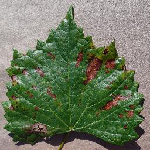

In [2]:
img_load = load_img('leaf.JPG' , target_size=(150,150))
img = img_to_array(img_load)
img_tensor = np.expand_dims(img  , axis=0)
print(f'Img_arr:{img.shape} \n Img_tensor:{img_tensor.shape}')
img_load

Kernel shape: (3, 3, 3, 32)
Kernel shape: (3, 3, 32, 64)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


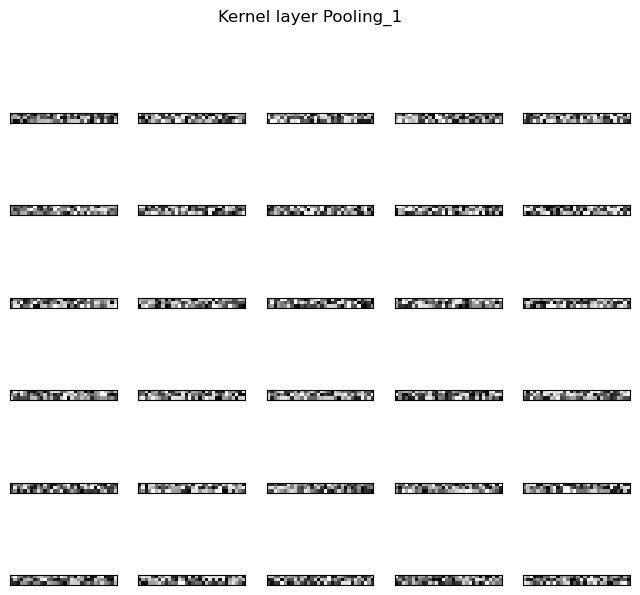

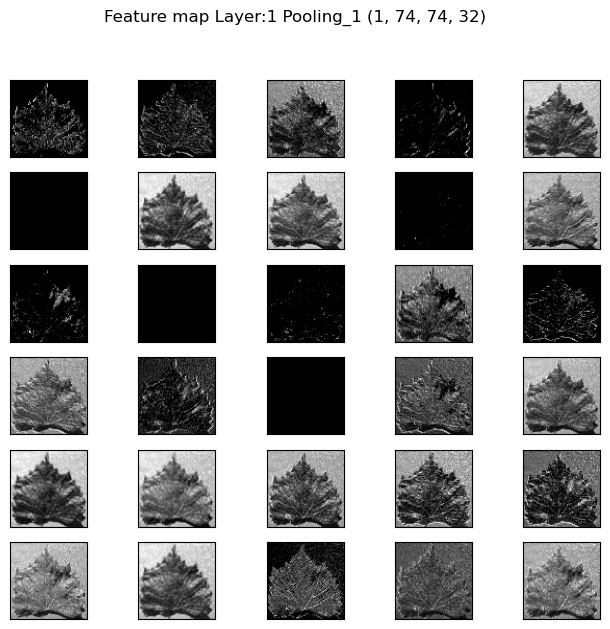

In [27]:
in_shape = (150,150,3)
model = Sequential()
model.add(Input(shape=(in_shape)))

model.add(Conv2D(32 , (3,3) , activation='relu' , name='Convo_1'))
model.add(MaxPool2D((2,2) , name='Pooling_1'))

model.add(Conv2D(64 , (3,3) , activation='relu' , name='Convo_2'))
model.add(MaxPool2D((2,2) , name='Pooling_2'))




for layer in model.layers:
    if 'Conv' not in layer.name:
        continue
    kernel , bias = layer.get_weights()
    print('Kernel shape:',kernel.shape)
    

# Kernel 3*3 -> [0] [1] [2]
kernel_idx = 0
layer_idx = 1
nplots = 30
fig = plt.figure(figsize=(8,7))
fig.suptitle(f'Kernel layer {model.layers[layer_idx].name}')
for i in range(nplots):
    plt.subplot(6,5,i+1)
    plt.imshow(kernel[kernel_idx,:,:,i] , cmap='gray')
    plt.xticks([])
    plt.yticks([])
    
    

model_for_feature = Model(inputs=model.inputs,
                         outputs=model.layers[layer_idx].output)
feature_maps = model_for_feature.predict(img_tensor)

fig = plt.figure(figsize=(8,7))
fig.suptitle(f'Feature map Layer:{layer_idx} {model.layers[layer_idx].name} {feature_maps.shape}')
for j in range(nplots):
    plt.subplot(6,5,j+1)
    plt.imshow(feature_maps[0,:,:,j] , cmap='gray')
    plt.xticks([])
    plt.yticks([])

In [23]:
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Convo_1 (Conv2D)                │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pooling_1 (MaxPooling2D)        │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Convo_2 (Conv2D)                │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pooling_2 (MaxPooling2D)        │ (None, 36, 36, 64)     │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,392 (75.75 KB)

 Trainable params: 19,392 (75.75 KB)

 Non-trainable params: 0 (0.00 B)